<a href="https://colab.research.google.com/github/Keyvoda/STA365/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1

In [56]:
import pymc as pm; import numpy as np; import pandas as pd

data = pd.read_csv('Training.csv')
y = data["Outcome"]
n=len(y)
X= data[["Age","BMI","Glucose","BloodPressure","SkinThickness"]]
X_numpy = X.to_numpy()
intercept = np.ones((X.shape[0], 1))

standard_X = np.concatenate([intercept, X_numpy], axis=1)

with pm.Model() as MLR:
    betas = pm.MvNormal('betas', mu=np.zeros(6), cov=np.eye(6), shape=(6))
    p = pm.math.sigmoid(pm.math.dot(standard_X, betas))
    y_obs = pm.Bernoulli('y_obs', p=p, observed=y)
with MLR:
    idata = pm.sample()

In [62]:

for feature in X:
    data[feature] = (data[feature] - data[feature].mean()) / data[feature].std()
X_numpy = X.to_numpy()
intercept = np.ones((X.shape[0], 1))
standard_X = np.concatenate([intercept, X_numpy], axis=1)

with pm.Model() as MLR2:
    betas = pm.MvNormal('betas', mu=np.zeros(6), cov=np.eye(6), shape=(6))
    p = pm.math.sigmoid(pm.math.dot(standard_X, betas))
    y_obs = pm.Bernoulli('y_obs', p=p, observed=y)
with MLR2:
    initial_values = {'betas': np.zeros(6)}
    idata = pm.sample(tune=1000, target_accept=0.99,initvals=initial_values)

Part 2

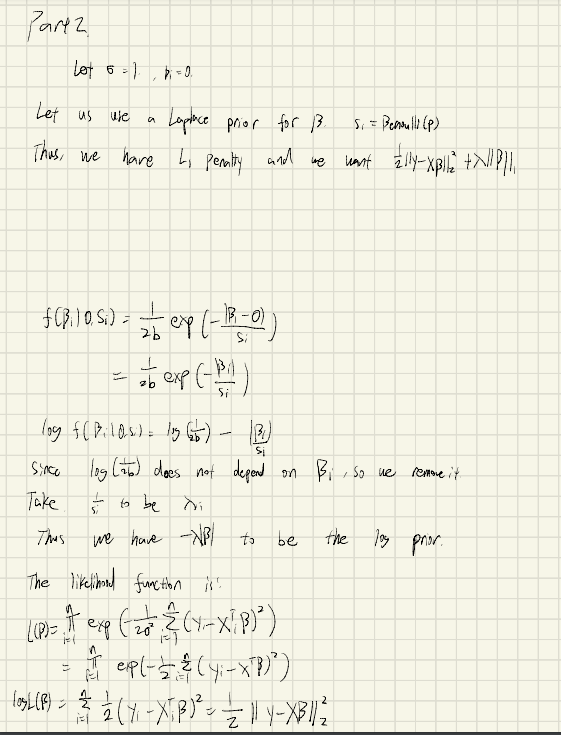


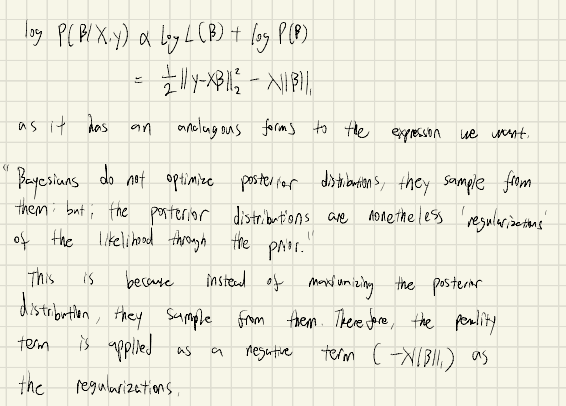
